In [1]:
# Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Package for processing EDF++ files
import mne

<h2>Importing The Raw EEG recording</h2>

In [2]:
# Necessary file names ready to go:
path = r"C:\Users\Jason Ha\Documents\University\4th Year\Thesis Project (Repo)\Jupyter Notebooks\Active Projects\mass_data\01-02-0001_PSG"
file = r"01-02-0001_PSG.edf"
scorer_annot_1 = r"01-02-0001_Annotations.csv"
scorer_annot_2 = r"01-02-0001_Annotations2.csv"
sleep_stages_filename = r"01-02-0001_Stages.edf"

# Load raw MNE file. Preload = False (Save hard drive memory):
raw_file = path + "\\" + file
raw = mne.io.read_raw_edf(raw_file, preload=False, verbose=False)

# Load annotations per the sleep stage EDF file into workspace
sleep_stages_file = path + "\\" + sleep_stages_filename
stages = mne.read_annotations(sleep_stages_file)

# Set the annotations onto the raw file:
raw.set_annotations(stages)

# Get the event and event_id from the annotations:
event, event_id = mne.events_from_annotations(raw)

# Create epochs from the event and event_id
epochs = mne.Epochs(raw, event, event_id, tmin=0.0, tmax=20, baseline=None) # 20 second epochs (based off stage annotations)

# Create dataframe from epochs
epochs_df = epochs.to_data_frame()

<ipython-input-2-9c3d9df424b6>:10: RuntimeWarning: 2 channel names are too long, have been truncated to 15 characters:
['EOG Lower Vertic', 'EOG Upper Vertic']
  raw = mne.io.read_raw_edf(raw_file, preload=False, verbose=False)


Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage ?', 'Sleep stage R', 'Sleep stage W']
1419 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 1419 events and 5121 original time points ...
0 bad epochs dropped
Converting "time" to "<class 'numpy.int64'>"...


In [3]:
epochs_df.head()

channel                   EOG Right Horiz  Resp nasal  EEG Pz-LER  \
condition     epoch time                                            
Sleep stage ? 0     0          -32.573788   20.132534 -257.963051   
                    4          -31.816386   19.894342 -257.963051   
                    8          -30.806517   19.822884 -257.963051   
                    12         -28.534311   19.965799 -257.963051   
                    16         -32.321321   20.251629 -257.963051   

channel                   EEG Fp1-LER  EMG Chin  EEG Fpz-LER  EEG Cz-LER  \
condition     epoch time                                                   
Sleep stage ? 0     0       -4.917746 -1.832980    -8.070029    1.344633   
                    4       -3.529177  2.874355    -5.121987    5.323181   
                    8       -5.170213  2.824788    -8.198205    1.087952   
                    12      -6.306314 -6.617764    -9.608139   -1.727513   
                    16      -6.053847 -7.633892   -11.915302   -6.347763   

channel                   EEG O1-LER  EEG C4-LER  EEG F3-LER  ...  EEG F8-LER  \
condition     epoch time                                      ...               
Sleep stage ? 0     0     -12.849489   -3.166658   -4.515893  ...  -21.353666   
                    4      -9.025625    0.124147   -2.478145  ...  -18.565971   
                    8     -13.612672   -3.801030   -4.897970  ...  -22.874228   
                    12    -13.485475   -4.435402   -4.897970  ...  -21.860520   
                    16    -12.849489   -6.084769   -6.298922  ...  -22.240660   

channel                   EOG Upper Verti  EEG T6-LER  EEG T4-LER  EEG F7-LER  \
condition     epoch time                                                        
Sleep stage ? 0     0          -71.761064  -11.318982  -14.040031    0.954687   
                    4          -67.964469   -6.939513   -9.458811    1.593110   
                    8          -67.205149   -8.065662  -10.983238    0.954687   
                    12         -64.420979   -5.312853   -8.696598    2.231534   
                    16         -63.408554   -3.561065   -8.061420    0.954687   

channel                   EEG P3-LER       ECG I  EEG A2-LER  EEG F4-LER  \
condition     epoch time                                                   
Sleep stage ? 0     0      -5.192701 -242.737900  -46.938327   -8.973465   
                    4       0.959612 -257.192393  -40.960060   -7.190436   
                    8      -3.780958 -255.987852  -40.069680  -11.265931   
                    12     -3.909298 -246.351523  -44.521581  -12.539523   
                    16     -5.449381 -253.578770  -48.854234  -14.457872   

channel                   EEG T3-LER  
condition     epoch time              
Sleep stage ? 0     0     -12.428005  
                    4     -10.120842  
                    8     -10.505369  
                    12     -8.710908  
                    16     -8.454557  

[5 rows x 27 columns]

In [4]:
eeg_epochs_df = epochs_df[['EEG C3-LER']]
eeg_epochs = eeg_epochs_df.loc["Sleep stage 2", :]
eeg_epochs

channel      EEG C3-LER
epoch time             
13    0       -4.456643
      4       -6.138015
      8       -6.138015
      12      -4.973989
      16      -1.740580
...                 ...
1409  19983    4.976825
      19987    4.718152
      19991    6.658197
      19995    6.270188
      19999    7.692888

[3815145 rows x 1 columns]

In [19]:
# Get all the unique epochs from the dataframe:
temp = epochs_df.reset_index(drop=False)
tmp = temp[temp['condition'] == 'Sleep stage 2']
epoch_list = tmp['epoch'].unique()

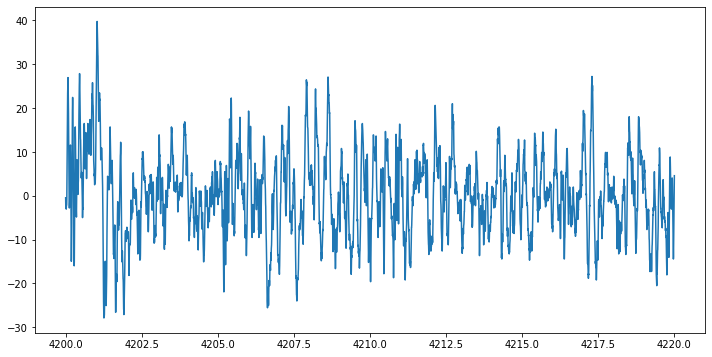

In [71]:
epoch = epoch_list[51]
example = eeg_epochs.loc[epoch]
signal = example['EEG C3-LER']

# Make time axis reflect the true time-value it was extracted from (from full EEG recording)
time = example.index.values / 1000
time = time + (epoch * 20)

fig = plt.figure(figsize=(12,6))
plt.plot(time, signal)
plt.show()

In [72]:
signal.interpolate(method='time').fillna(0)

time
0       -0.447217
4       -2.128589
8       -2.128589
12      -2.257926
16      -2.904607
           ...   
19983   -6.008679
19987   -3.292616
19991    0.320717
19995    2.778107
19999    4.588816
Name: EEG C3-LER, Length: 5121, dtype: float64

In [73]:
scorer_1 = path + "\\" + scorer_annot_1
s1_df = pd.read_csv(scorer_1)
s1_df.columns = ['start', 'duration']
s1_df['end'] = s1_df['start'] + s1_df['duration']

# Make a temporary column for the start times rounded to the nearest integer:
s1_df['start_floor'] = s1_df['start'].astype('int32')

scorer_2 = path + "\\" + scorer_annot_2
s2_df = pd.read_csv(scorer_2)
s2_df.columns = ['start', 'duration']
s2_df['end'] = s2_df['start'] + s2_df['duration']

# Make a temporary column for the start times rounded to the nearest integer:
s2_df['start_floor'] = s2_df['start'].astype('int32')

# Get the 'inner join' of the two scorers' dataframes in order to get the ground truth.
scorer_inner = pd.merge(s1_df, s2_df, how='inner', on=['start_floor'])
scorer_inner.head()

# Take the mean of the start (onset) tie, duration of the spindle and the end time for each scorer:
scorer_final = pd.DataFrame()
scorer_final['start'] = (scorer_inner['start_x'] + scorer_inner['start_y']) / 2
scorer_final['duration'] = (scorer_inner['duration_x'] + scorer_inner['duration_y']) / 2
scorer_final['end'] = (scorer_inner['end_x'] + scorer_inner['end_y']) / 2

scorer_final.head()

,start,duration,end
0,905.642463,0.837840,906.480303
1,917.432942,1.312416,918.745359
2,949.362705,0.777293,950.139999
3,968.654275,1.156180,969.810455
4,978.624430,0.785106,979.409536


In [74]:
# Set parameters for window length (Tw) and stride. These parameters should be tuneable by the user.
Tw = 1.0     # (1.0 second window length)
stride = 0.5 # (Half a second overlap)

# Compute the frame length based on time-vector from dataframe. Since MNE creates a timestep of 4ms, the frame length
# in samples is (Tw * 1000) / 4. The 1000 is the convert to milliseconds and the divide by 4 converts the time to
# upper array index for the time and signal array.
frame_len = int(Tw * 1000 / 4)
shift = int(stride * 1000 / 4)

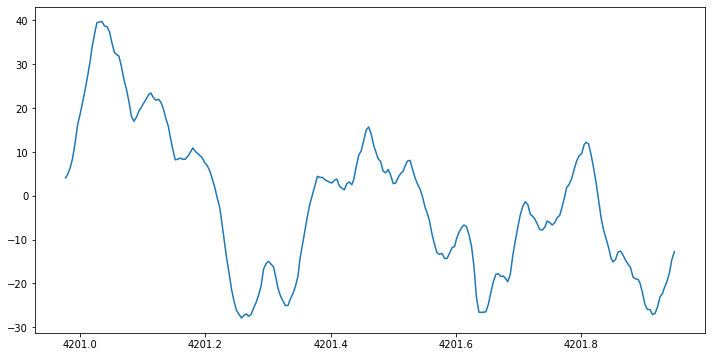

In [75]:
curr_shift_factor = 2

fig = plt.figure(figsize=(12,6))
time_6 = time[0 + (curr_shift_factor*shift) : frame_len + (curr_shift_factor*shift)]
signal_6 = signal[0 + (curr_shift_factor*shift) : frame_len + (curr_shift_factor*shift)]
plt.plot(time_6, signal_6)
plt.ticklabel_format(useOffset=False)
plt.show()

In [76]:
# Take the time-vector from frame 6 and check if any of the spindle onset times fall in the time-vector:
condition = (scorer_final['start'] > min(time_6)) & (scorer_final['start'] < max(time_6))

# If this is true, we should see a particular spindle extracted from the annotations:
fall_in = scorer_final[condition]
fall_in

,start,duration,end


TypeError: cannot convert the series to <class 'float'>

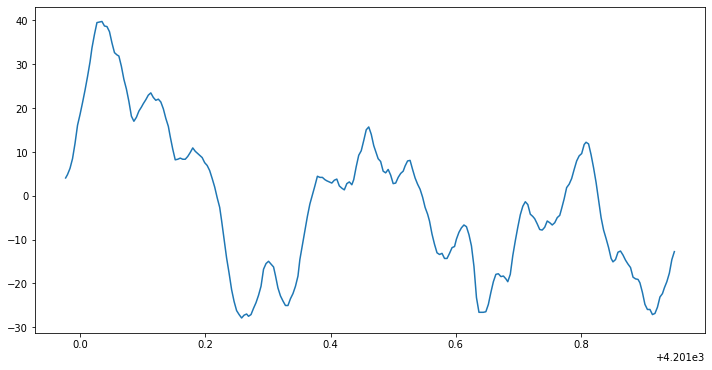

In [77]:
fig = plt.figure(figsize=(12,6))
plt.plot(time_6, signal_6)
plt.axvline(float(fall_in['start']), color='red', label='Spindle Onset')
plt.legend()
plt.show()

Need to determine number of taps for the FIR filter:

<h3>Filtering & Windowing</h3>

In [48]:
from scipy.signal import butter, lfilter, firwin, filtfilt
from scipy.signal.windows import hann

def butter_bandpass(lowcut, highcut, fs, order = 5):
	nyq = 0.5 * fs
	low = lowcut / nyq
	high = highcut / nyq
	b,a = butter(order, [low, high], btype='band', output='ba')
	return b,a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
	b,a = butter_bandpass(lowcut, highcut, fs, order=order)
	y = filtfilt(b, a, data, padlen=25)
	return y

filtered = butter_bandpass_filter(signal_6, 11.0, 16.0, sampling_rate, order=5)

TypeError: cannot convert the series to <class 'float'>

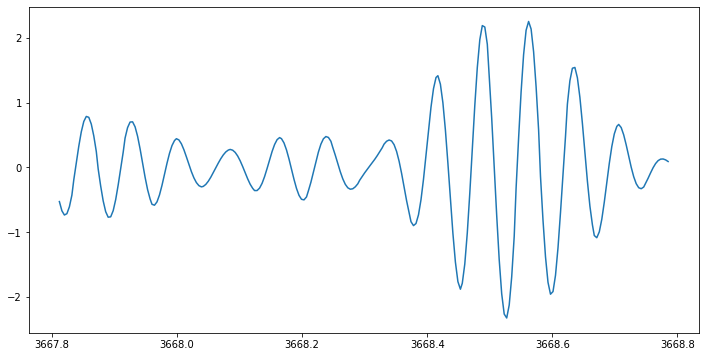

In [49]:
fig = plt.figure(figsize=(12,6))
plt.plot(time_6, filtered)
#plt.plot(time_6, signal_6)
plt.axvline(float(fall_in['start']), color='red', label='Spindle Onset')
plt.axvline(float(fall_in['end']), color='blue', label='Spindle End')
plt.axvspan(float(fall_in['start']), float(fall_in['end']), color='red', alpha=0.15)
plt.legend()
plt.show()